In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


**we have datasets in the keras**

In [2]:
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

- **now we will work on mnist dataset**
- The MNIST dataset contains 70,000 images of handwritten digits (zero to nine)
-  that have been size-normalized and centered in a square grid of pixels.
-   Each image is a 28 × 28 × 1 array of floating-point numbers representing grayscale intensities ranging from 0 (black) to 1 (white).
-   The target data consists of one-hot binary vectors of size 10, corresponding to the digit classification categories zero through nine

In [3]:
mnist=keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\Venkatesh\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [4]:
type(mnist)

module

**now load the data**

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
len(X_train[0])

28

In [10]:
X_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [11]:
len(X_train[0][0])

28

In [12]:
min(y_train),max(y_train)   # ten output  classes 

(0, 9)

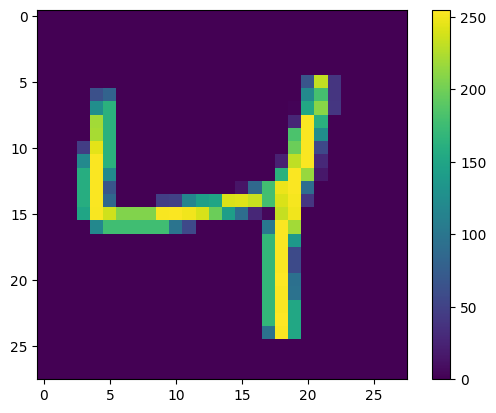

In [13]:
plt.imshow(X_train[2])
plt.colorbar()
plt.show()

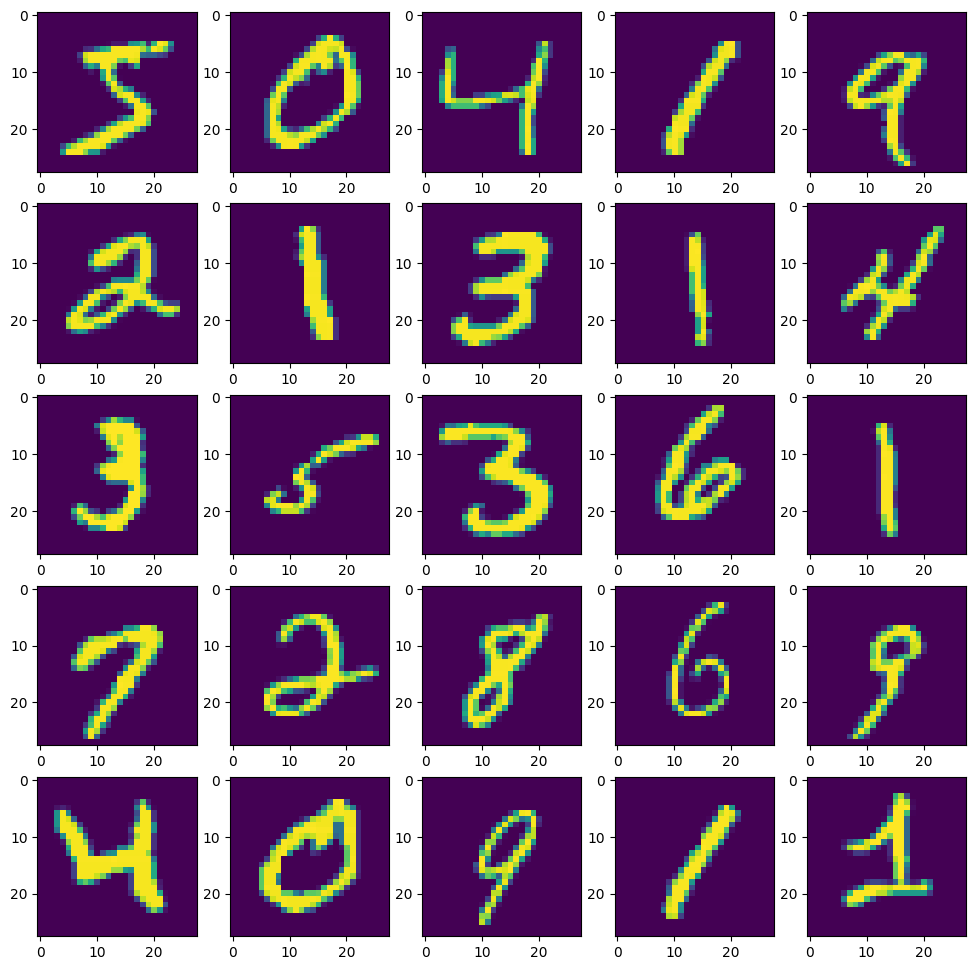

In [14]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])

**normalization of the data**

In [15]:
X_train=X_train/255.0
X_test=X_test/255.0

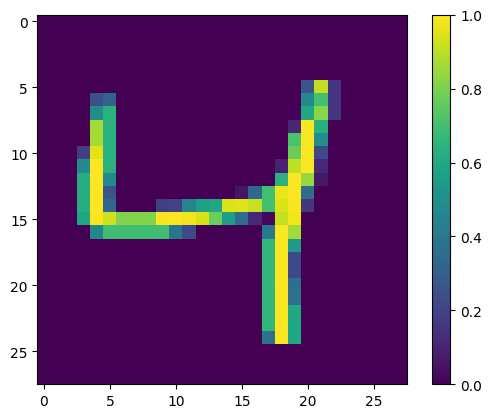

In [16]:

plt.imshow(X_train[2])
plt.colorbar()
plt.show()

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [18]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [21]:
model.fit(X_train,
          y_train,
          epochs = 10,
          batch_size=64,
          verbose=True)

Epoch 1/10


938/938 [==============================] - 3s 3ms/step - loss: 0.2982 - accuracy: 0.9153
Epoch 2/10
938/938 [==============================] - 2s 3ms/step - loss: 0.1333 - accuracy: 0.9615
Epoch 3/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0935 - accuracy: 0.9726
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0717 - accuracy: 0.9788
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0567 - accuracy: 0.9831
Epoch 6/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0466 - accuracy: 0.9863
Epoch 7/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0374 - accuracy: 0.9892
Epoch 8/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0301 - accuracy: 0.9916
Epoch 9/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0266 - accuracy: 0.9919
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0213 - accuracy: 0.99

**model accuracy**

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0752 - accuracy: 0.9779
0.9779000282287598


**model predictions**

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
y_pred = model.predict(X_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[2.63351296e-08, 2.63328300e-11, 2.31632066e-06, ...,
        9.99870300e-01, 3.94244694e-07, 1.38160249e-06],
       [1.18845671e-08, 9.07279457e-07, 9.99998808e-01, ...,
        5.14786457e-17, 9.61462305e-08, 2.11582689e-15],
       [6.52298070e-07, 9.98072743e-01, 7.33381021e-04, ...,
        6.70305686e-04, 5.07663761e-04, 2.52629570e-06],
       ...,
       [3.74090204e-14, 1.05196308e-13, 1.15306202e-12, ...,
        7.67527240e-07, 1.36769827e-07, 5.14844805e-06],
       [1.65240510e-09, 6.00048761e-11, 1.33532187e-11, ...,
        2.71168044e-09, 1.64935645e-03, 6.96581404e-11],
       [1.20857422e-07, 8.77214273e-12, 1.50149866e-08, ...,
        1.11122652e-13, 1.09266554e-10, 1.08052855e-11]], dtype=float32)

In [25]:
len(y_pred)

10000

In [26]:
y_pred[0]    # 10 outputs for 10 classes

array([2.6335130e-08, 2.6332830e-11, 2.3163207e-06, 1.2552526e-04,
       1.5952670e-11, 4.1637104e-08, 5.0120908e-14, 9.9987030e-01,
       3.9424469e-07, 1.3816025e-06], dtype=float32)

In [27]:
np.sum(y_pred[0])

1.0

In [28]:
max=np.max(y_pred[0])
max

0.9998703

In [29]:
index=list(y_pred[0]).index(max)
index

7

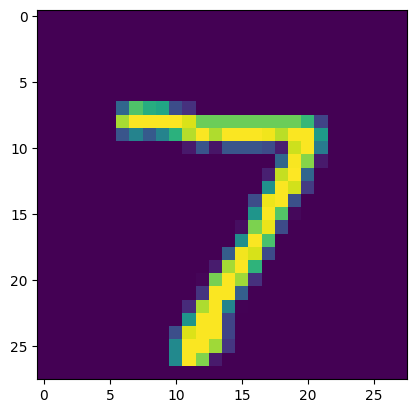

In [30]:
plt.imshow(X_test[0])


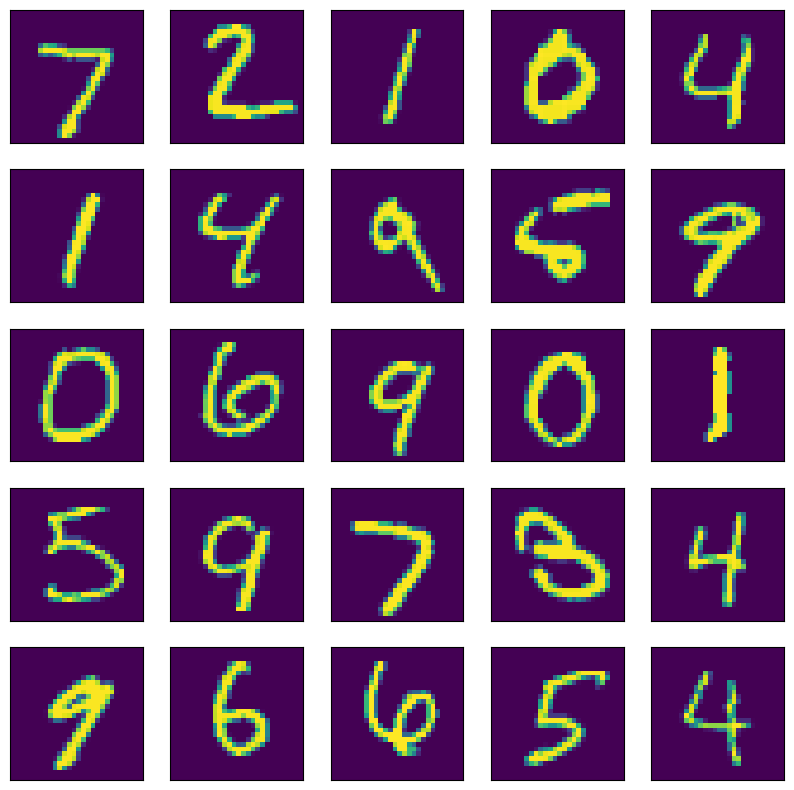

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
plt.show()

In [32]:
model.save_weights('./checkpoints/my_checkpoint')

In [33]:
model.load_weights('./checkpoints/my_checkpoint')